In [31]:
#getting libraries
using Distributions
using Distances
using Random
using Plots
using Statistics
using Flux
using TSPLIB

## BENCHMARK FUNCTIONS

UNIMODAL

In [2]:
# De Jong (sphere) function

sphere(x)=sum(x.^2)


#Chung Reynolds

function Chung_Reynolds(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += x[i]^2
    end
    val = sum^2
    return val
end

# Schwefel 2.22 function

function schwefel_2_22(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
        prod *= abs(x[i])
    end
    val = sum+ prod
    return val
end

# Schwefel 2.20 function

function schwefel_2_20(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += abs(x[i])
    end
    val = sum
    return val
end

# Schwefel 2.23 function

function schwefel_2_23(x)
    sum = 0
    n = length(x)
    for i in 1:n
        sum += x[i]^10
    end
    val = sum
    return val
end

# Sum Squares function

function Sum_Squares(x)
    sum = 0
    n = length(x)
    for i in 1:n
        ele = x[i]^2
        sum += (i*ele)
    end
    val = sum
    return val
end

# Powell Sum function

function Powell_Sum(x)
    sum = 0
    n = length(x)
    for i in 1:n
        ele = abs(x[i])
        sum += ele^(i+1)
    end
    val = sum
    return val
end

# Powell Singular-2 function

function Powell_Singular_2(x)
    sum = 0
    n = length(x)
    for i in 2:n-3
        p1 = (x[i-1] - 10x[i])^2
        p2 = 5*((x[i+1] + x[i+2])^2)
        p3 = (x[i] - x[i+1])^4
        p4 = 10*((x[i-1] + x[i+2])^4)
        sum += p1 + p2 + p3 +p4
    end
    val = sum
    return val
end

Powell_Singular_2 (generic function with 1 method)

MULTIMODAL

In [4]:
# ackley function

function ackley(x)
    # x = [x1, x2, ..., xd]
    # a = default value 20
    # b = default value 0.2
    # c = default value 2*pi
    a = 20
    b = 0.2
    c = 2*π
    n = length(x)
    sum1 = 0
    sum2 = 0
    for i in 1:n
        sum1 += x[i]^2
        sum2 += cos(c*x[i])
    end
    
    term1 = -a * exp(-b*sqrt(sum1/n))
    term2 = -exp(sum2/n)
    y = term1 + term2 + a + exp(1)
    return y
end

# rastrigin function

function rastrigin(x)
    val = -10length(x)
    n = length(x)
    for i in 1:n
        val += -x[i]^2+10cos(π*x[i])
    end
    val =-val
    return val
end

# Brown function

function brown(x)
    val = 0
    n = length(x)
    for i in 1:n-1
        p1 = x[i]^2
        p2 = x[i+1]^2
        val += p1^(x[i+1]^2 + 1) + p2^(x[i]^2+1) 
    end
    return val
end

# cigar function

function cigar(x)
    val = 0
    n = length(x)
    for i in 2:n
        val += x[i]^2
    end
    val *= 10^6
    val += x[1]^2
    return val
end


# Csendes function

function csendes(x)    
    n = length(x)
    result = 0.0
    for i in 1:n
        if x[i] != 0
            result += x[i]^6 * (2 + sin(1 / x[i]))
        else
            result += x[i]^6 * 2
        end
    end
    return result

    
end

# Griewank function

function griewank(x)
    sum = 0
    prod = 1
    n = length(x)
    for i in 1:n
        sum += (x[i]^2) / 4000
        prod *= cos(x[i]/(i^1/2))
    end
    val = 1+ sum - prod
    return val
end

# Schwefel 2.25 function

function schwefel_2_25(x)
    sum = 0
    n = length(x)
    for i in 2:n
        p1 = (x[i]-1)^2
        p2 = (x[1] - x[i]^2)^2
        sum += p1 + p2
    end
    val = sum
    return val
end

# Zakharov function

function zakharov(x)
    sum1 = 0
    sum2 = 0
    n = length(x)
    for i in 2:n
        sum1 += x[i]^2
        sum2 += 0.5 * i * x[i]
    end
    val = sum1 + sum2^2 + sum2^4
    return val
end

zakharov (generic function with 1 method)

FIXED DIMENSION

In [5]:
# zirilli function

function zirilli2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.5 * (x1 ^ 2)) + (0.5 * (1 - cos(2*x1)) ) + (x2 ^ 2)
    return val
end

# matyas function

function matyas2(x)
    x1 = x[1]
    x2 = x[2]
    val = (0.26 * ((x1 ^ 2) + (x2 ^ 2) ))  - (0.48 * x1 * x2)
    return val
end


# Trecanni function

function trecanni2(x)
    x1 = x[1]
    x2 = x[2]
    term1 = x1^4
    term2 = 4 * x1^3
    term3 = 4 * x1^2
    term4 = x2^2
    return term1 + term2 + term3 + term4
end

# Price function

function price2(x)
    x1 = x[1]
    x2 = x[2]
    val = ((2*(x1^3)*x2) - x2^3)^2 + (6*x1 - x2^2 + x2)^2
    return val
end

# Chen Bird function

function chen_bird2(x)
    x1 = x[1]
    x2 = x[2]
    b = 0.001
    #val = (0.001 / (floor(0.001^2 + (x1 -0.4x2 -0.1)^2))) - (0.001 / (floor(0.001^2 + (2x1 +x2 -1.5)^2)))
    term1 = b / (b^2 + (x1^2 + x2^2 - 1)^2)
    term2 = b / (b^2 + (x1^2 + x2^2 - 1/2)^2)
    term3 = b / (b^2 + (x1 - x2)^2)
    return term1 + term2 + term3
end

# Colville function

function colville4(x)
    x₁, x₂, x₃, x₄ = x
    term1 = 100 * (x₁^2 - x₂)^2
    term2 = (x₁ - 1)^2
    term3 = (x₃ - 1)^2
    term4 = 90 * (x₃^2 - x₄)^2
    term5 = 10.1 * ((x₂ - 1)^2 + (x₄ - 1)^2)
    term6 = 19.8 * (x₂ - 1) * (x₄ - 1)
    return term1 + term2 + term3 + term4 + term5 + term6
end


colville4 (generic function with 1 method)

## HONEY BADGER ALGORITHM

RANDOM POPULATION GENERATOR

In [6]:
# create m random vectors of d dimensions in the range [a,b]
function rand_population_uniform(m, d, a, b)
    return [rand(Uniform(a,b),d) for i in 1:m]
end

rand_population_uniform (generic function with 1 method)

INTENSITY FUNCTION

In [7]:
# intensity function

function intensity(N, x, x_prey)
    d = zeros(N)
    S = zeros(N)
    I = zeros(N)
    for i in 1:N-1
        d[i] = euclidean(x[i], x_prey) ^ 2
        S[i] = euclidean(x[i],x[i+1]) ^ 2
    end
    d[N] = euclidean(x[N], x_prey)
    S[N] = euclidean(x[N],x[1])
    for i in 1:N
        r2 = rand(Uniform(0,1))
        I[i] = r2 * S[i] / (4 * π * d[i] )
    end
    return I
end

intensity (generic function with 1 method)

HONEY BADGER ALGORITHM

In [11]:
# Honey Badger Algorithm

function my_metaheuristic(t_max, N, beta, C, x, obj_func)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #calucalte the fitness of each honey badger
    f = obj_func.(x)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    #println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                f_new = obj_func(x_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                f_new = obj_func(x_new)
            end
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                #println("prey position is improved with honey badger # ", i)
                x_prey = x_new
                f_prey = f_new
            end
            
        end
        push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
   return x_prey, f_prey, fitness_values 
end
    

my_metaheuristic (generic function with 1 method)

Code for running my_metaheuristic

****Statistical Analysis****
Mean Solution: 5.27925580284534e-29
Standard Deviation: 1.400950222332397e-28
****Convergence Graph****
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[4.367706095841922e9, 3.2318979137868043e6, 216100.44810367882, 1028.6267516466787, 378.06761186664966, 36.05339517334789, 0.08209315757825777, 0.0010793208794937217, 6.693258644644417e-5, 1.7733094214219334e-6, 6.337265547976498e-8, 5.757387058677277e-10, 3.7446039640627246e-13, 9.421460841064704e-14, 7.64448416298031e-17, 4.1923528472199495e-18, 2.5408043274681924e-21, 1.9328429274904845e-23, 7.93261356037791e-25, 2.3351333982288885e-26, 5.27925580284534e-29]


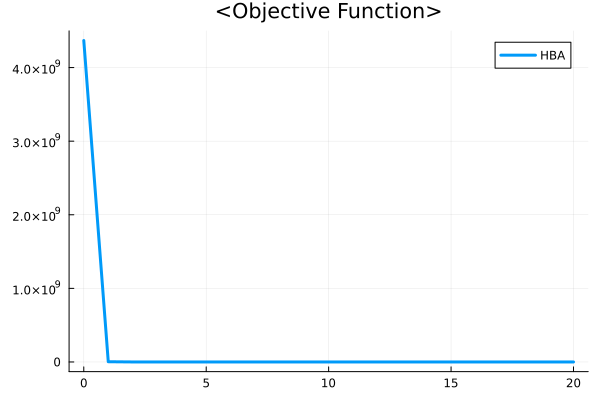

In [14]:
#dimensions
d = 30
#lower bound
a = -100
#upper bound
b = 100
# population size
N = 50
#iterations
t_max = 20
#constant beta
beta = 6
#constant C
C = 2
#objective function
obj_func(x) = Chung_Reynolds(x)



iter = []
simul = zeros(t_max+1)
best_value = []
for i in 1:30
    #generate honey badgers
    x = rand_population_uniform(N, d, a, b)
    x_prey, f_prey, fitness_values = my_metaheuristic(t_max, N, beta, C, x, obj_func)
    #println("best solution: ", x_prey, " fitness: ", f_prey)
    simul += last.(fitness_values)
    if i ==1
        iter = first.(fitness_values)
    end
    push!(best_value, f_prey)
end
simul = simul/30
println("****Statistical Analysis****")
println("Mean Solution: ", mean(best_value))
println("Standard Deviation: ", std(best_value))

println("****Convergence Graph****")
x_val = iter
y_val = simul
println(x_val)
println(y_val)
plot(x_val, y_val, title="<Objective Function>", label="HBA", linewidth=3)

## BENCHMARK RESULTS

Statistical Analysis

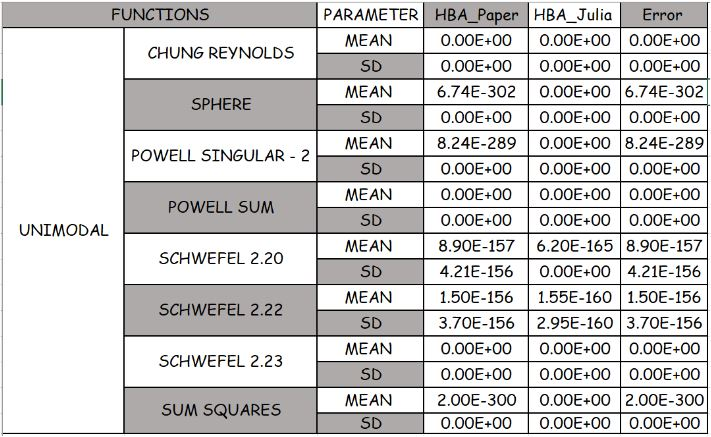

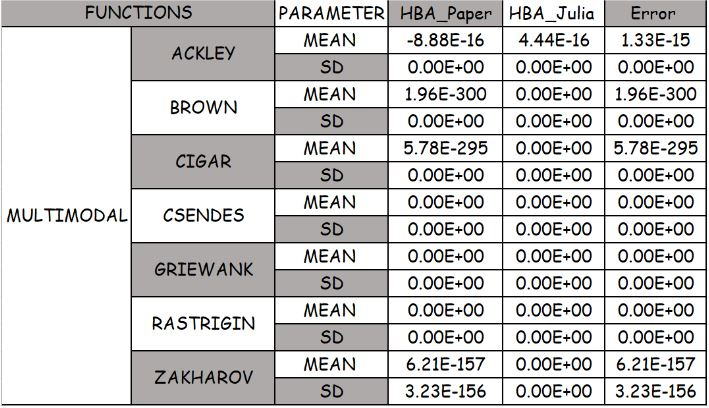

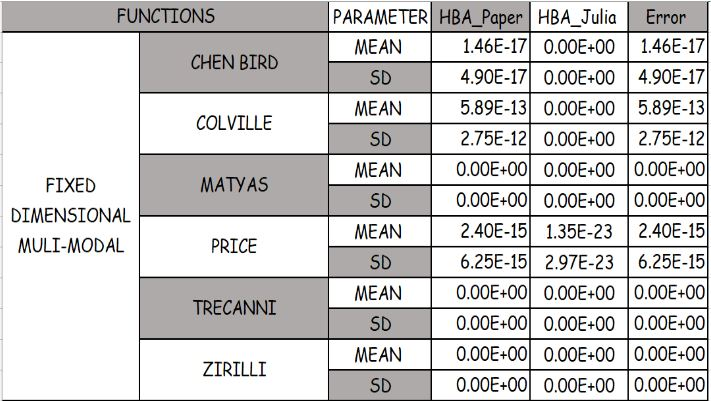

Convergence Analysis

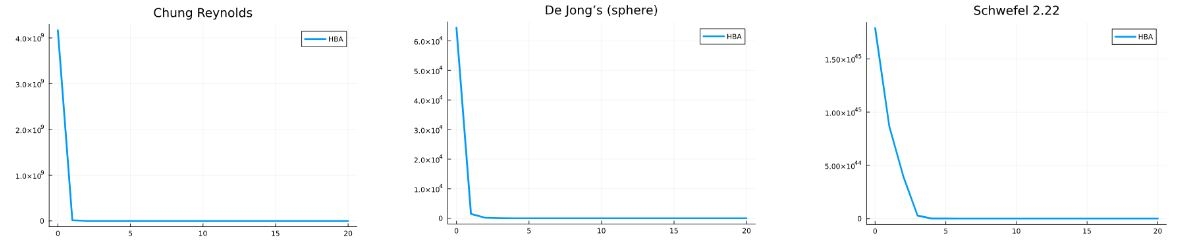

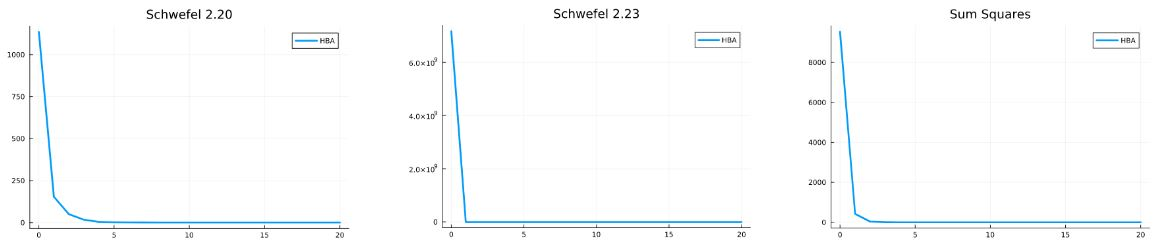

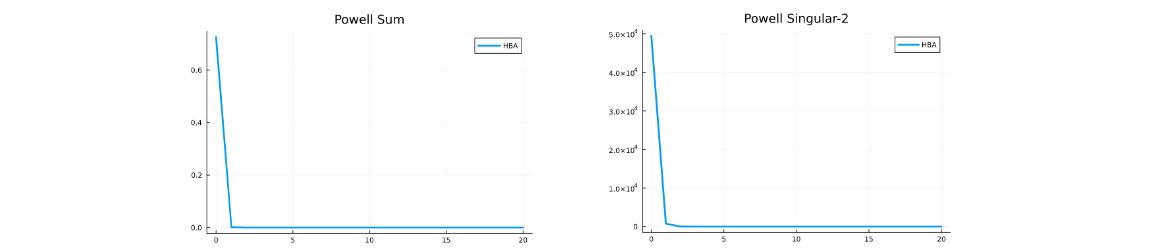

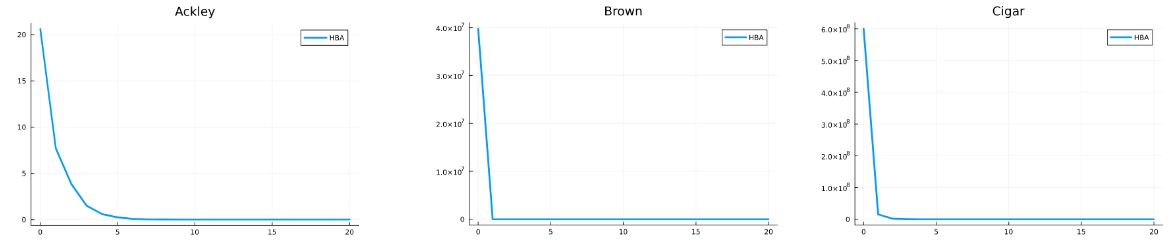

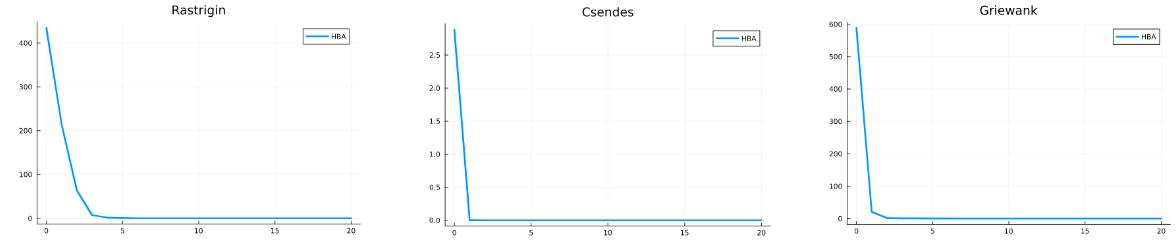

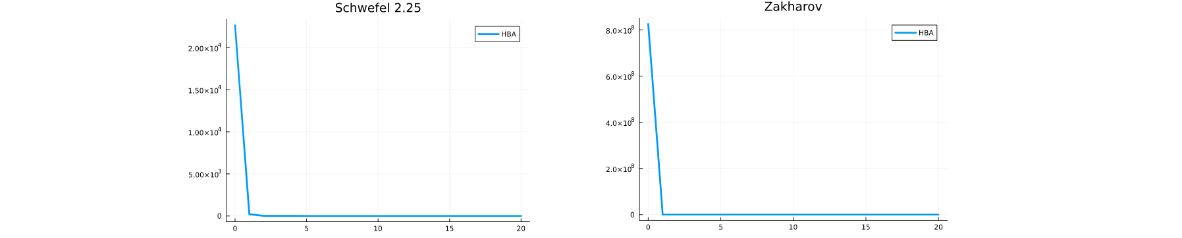

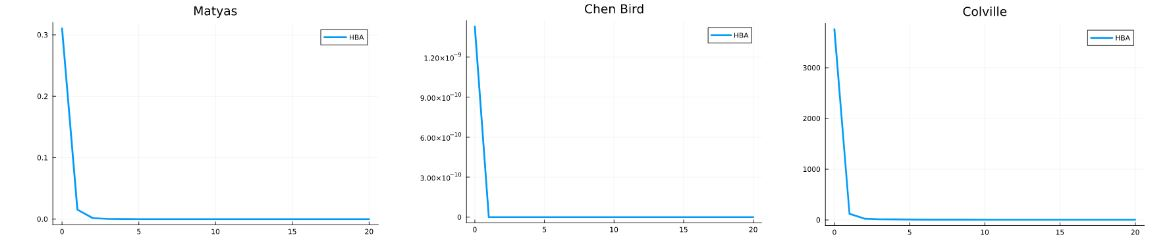

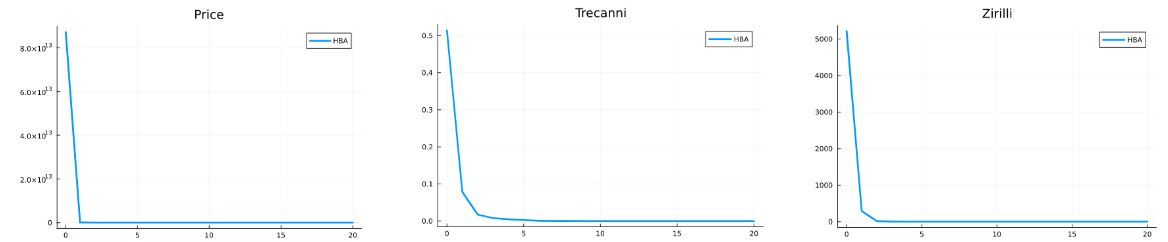

## TSP CODE

Define TSP Problem. Only run one of (1) or (2) from below. These cells ensure distances matrix and n cities are defined for futher code to execute

(1) Random Problem of n cities

In [20]:
# 2d-world
n=7 # cities

# create n cities in a 1x1 square
x = rand(2,n) 

# compute Euclidean distance between cities 
distances=pairwise(Euclidean(), x, dims=2)

7×7 Matrix{Float64}:
 0.0        0.470884  0.390855  0.245824  0.857716  0.363279  0.0179302
 0.470884   0.0       0.319506  0.367227  0.389843  0.474002  0.477343
 0.390855   0.319506  0.0       0.471602  0.59949   0.169108  0.38445
 0.245824   0.367227  0.471602  0.0       0.743842  0.526455  0.262803
 0.857716   0.389843  0.59949   0.743842  0.0       0.767737  0.862752
 0.363279   0.474002  0.169108  0.526455  0.767737  0.0       0.350216
 0.0179302  0.477343  0.38445   0.262803  0.862752  0.350216  0.0

(2) TSPLIB

In [21]:
tsp = readTSPLIB(:burma14)
distances = tsp.weights

# 2d-world
n=tsp.dimension # cities
println("# of cities: ", n)

# optimal value
println("Optimal value: ", tsp.optimal)

# of cities: 14
Optimal value: 3323.0


HELPER FUNCTIONS

In [17]:
# Define a function to calculate the cumulative probabilities
function cum_probabilities(solution, tour, distances)
    # Initialize an array of zeros to store the probabilities
    probs = zeros(length(solution))
    
    # Calculate the probabilities for each city
    for i in 1:length(solution)
        if i ∉ tour
            probs[i] = (solution[i])  * (1/distances[tour[end], i])
        end
    end
    
    probs /= sum(probs)
    
    # Calculate the cumulative probabilities
    cum_probs = cumsum(probs)
    
    return cum_probs
end


# Define a function to select the next city based on the probabilities
function select_city(cum_probs)
    # Generate a random number between 0 and 1
    r = rand()
    
    #println("random value: ", r)
    # Find the index of the first cumulative probability that is greater than r
    index = findfirst(cum_probs .>= r)
    #println("next city: ", index)
    return index
end


#generate tour function

function generateTour(solution)
    
    #println("New Tour..")
    # Initialize the tour as an array of zeros
    tour = zeros(Int, n)

    # Set the first city as the one with the smallest value in the solution
    tour[1] = argmin(solution)
    
    # Generate the rest of the tour using the cumulative probabilities
    for i in 2:n
        # Calculate the cumulative probabilities
        cum_probs = cum_probabilities(solution, tour[1:i-1], distances)
        #println("Cum Probs: ", cum_probs)
        #println("Tour so far...: ", tour)
        # Select the next city based on the probabilities
        next_city = select_city(cum_probs)
    
        # Add the next city to the tour
        tour[i] = next_city
    end

    # Print the tour
    #println("The TSP tour is: ", tour)
    return tour
end


generateTour (generic function with 1 method)

TOUR COST / FITNESS FUNCTION

In [18]:
function tour_cost(o::Array{Int64,1})
    n=length(o)
    result = distances[o[n],o[1]]
    for i in 1:(n-1)
        result += distances[o[i],o[i+1]]
    end
    return result
end

tour_cost (generic function with 1 method)

MODIFIED HONEY BADGER ALGORITHM

In [19]:
# Honey Badger Algorithm

function my_tsp_solver(t_max, N, beta, C, x)
    # t_max = maximum no of iterations
    # N = population size
    # beta = default value as 6
    # C = default value as 2
    # x = initial population
    # obj_func = benchmark function
    # f = fitness of the population
    # x_prey = best position found so far
    # f_prey = best fitness value so far for the x_prey
    # x_new = new position calculated for the ith honey badger
    # f_new = new fitness calculated for the ith honey badger
    # I = intensity of the honey badger
    # F = disturbance direction
    
    #generate tour from initial solution
    
    
    #calucalte the fitness of each honey badger
    tours = generateTour.(x)
    f = tour_cost.(tours)
    #println("fitness vecor: ", f)
    
    #save best posiiton and fitness
    f_prey, x_prey_index = findmin(f)
    x_prey = x[x_prey_index]
    t_prey = tours[x_prey_index]
    
    
    #println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
    #println("fitness: ", f_prey)
    fitness_values = []
    push!(fitness_values,(0,f_prey))
    for t in 1:t_max
        
        #println("iteration: ", t)
        
        #calculate the density factor / decreasing factor
        alpha = C * exp(-t / t_max)
        #println("alpha: ", alpha)
        
        #calcualte the intensity of the all honey badgers
        I = intensity(N, x, x_prey)
        #println("Intensity: ", I)
        
        for i in 1:N
            
            #calcuate distance between prey and ith honey badger
            d = x_prey - x[i]
            
            #generate disturbance
            r6 = rand(Uniform(0,1))
            if r6<=0.5
                F = 1
            else
                F = -1
            end
            
            
            #generate a random value to deicde between digging vs honey mode
            r2 = rand(Uniform(0,1))
            
            #TODO : if intensity is infinite then go for honey mode
            if isinf(I[i])
                r2 = 0.9
            end
            
            if r2<0.5
                # digging mode
                #println("Digging mode")
                r3 = rand(Uniform(0,1))
                r4 = rand(Uniform(0,1))
                r5 = rand(Uniform(0,1))
                #println("Intensity: ", I[i])
                #p = abs(cos(2*π*r4) * (1 - cos(2*π*r5)))
                #println("cos value: ", p)
                x_new = x_prey + (F * beta * I[i] * x_prey) + (F * r3 * alpha * d * abs(cos(2*π*r4) * (1 - cos(2*π*r5))))
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            
            else
                # honey node
                #println("Honey mode")
                r7 = rand(Uniform(0,1))
                x_new = x_prey + (F * r7 * alpha * d)
                #f_new = obj_func(x_new)
                t_new = generateTour(x_new)
                f_new = tour_cost(t_new)
            end
            
            #TODO: mange xnew to be within the bounds
            
            # evaluate the new posiiton and fitness values
            
            #local position update
            if f_new < f[i]
                #println("local position is improved")
                #println("values", x[i], ";", x_new, ";", f[i], ";", f_new  )
                x[i] = x_new
                f[i] = f_new
                
                #println("local position is improved fin")
            end
            
            #prey position update
            if f_new<f_prey
                println("prey position is improved with honey badger # ", i, " in iteration # ", t)
                x_prey = x_new
                f_prey = f_new
                t_prey = t_new
                #println("best solution: ", x_prey, " fitness: ", f_prey,  " tour: ", t_prey)
                push!(fitness_values,(t,f_prey))
            end
            
        end
        #push!(fitness_values,(t,f_prey))
        #println("fitness: ", f_prey)
    end
    return x_prey, f_prey, t_prey, fitness_values 
end
    

my_tsp_solver (generic function with 1 method)

Code to run my_tsp_solver

In [25]:
#dimensions = # of cities
d = n
#lower bound
a = 0
#upper bound
b = 1
# population size
N = 25
#iterations
t_max = 200
#constant beta
beta = 6
#constant C
C = 2

best_value = []
tours = []
for i in 1:5
    x = rand_population_uniform(N, d, a, b )
    x_prey, f_prey, t_prey, fitness_values = my_tsp_solver(t_max, N, beta, C, x)
    push!(best_value, f_prey)
    push!(tours, t_prey)
    println(best_value)
end

println("****Statistical Analysis****")
println("Mean Solution: ", mean(best_value))
println("Standard Deviation: ", std(best_value))
println("Best Solution: ", minimum(best_value))


prey position is improved with honey badger # 13 in iteration # 1
prey position is improved with honey badger # 7 in iteration # 2
prey position is improved with honey badger # 5 in iteration # 3
prey position is improved with honey badger # 5 in iteration # 9
prey position is improved with honey badger # 3 in iteration # 14
prey position is improved with honey badger # 3 in iteration # 15
prey position is improved with honey badger # 20 in iteration # 29
prey position is improved with honey badger # 11 in iteration # 50
prey position is improved with honey badger # 9 in iteration # 118
Any[3607.0]
prey position is improved with honey badger # 17 in iteration # 1
prey position is improved with honey badger # 19 in iteration # 1
prey position is improved with honey badger # 25 in iteration # 1
prey position is improved with honey badger # 3 in iteration # 2
prey position is improved with honey badger # 21 in iteration # 9
prey position is improved with honey badger # 13 in iteration # 2

## TSP BENCHMARK RESULTS

No. of runs = 30

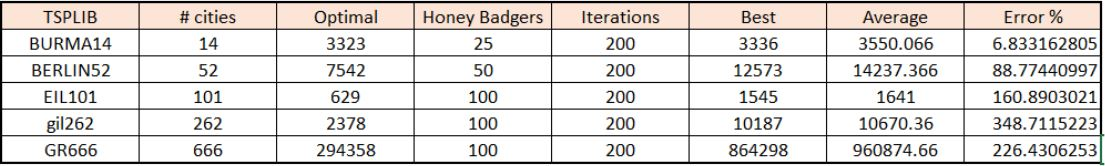

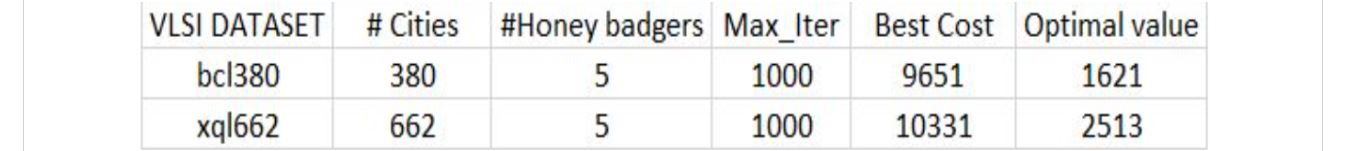

## TSP ART

## REPORT

### Summary

The project is accomplised in mainly four sections. The first part was to select a template paper of a recent metaheuristic algorithm that solves continuous global optimization problems. The Algorithm chosen is Honey Badger Algorith (HBA) as claims to be superior to other methods in terms of convergence speed and exploration–exploitation balance. Our second step was to implement and benchmark the HBA in Julia programming language. The algorithm was completey implemented with the help of psuedocode provided by the authors of the paper. The algorithm was benchmarked for statistcal analysis and convergence analysis to make sure we had a correct implementation done. The third step is to modify the algorithm to solve the combinatorial TSP problem. A major focus was kept at preserving the original algorithm equations of the HBA and the idea was to massage the TSP problem into the HBA algorithm rather than modifying much of the algorithm for the problem itself. The key idea here was to generate a TSP tour using the distance matrix and the location of the Honey Badger using a probabilistic model. Furthermore, we benchmark the algorithm for the TSPLIB problems and VLSI dataset by looking at the error percentage, best and mean values achieved. The last part of the project is to generate an original art using the TSP algorithm. We proceeded with generating a 3D TSP image art of our university's spirit mascot Tuffy.

### Material & Methods

#### Introduction

In this project, we aimed to solve the Traveling Salesman Problem (TSP) using the Honey Badger Optimization (HBA) algorithm. The HBA is a nature-inspired optimization technique that mimics the foraging behavior of honey badgers to find the optimal solution for a given problem. Our implementation of the HBA algorithm was written in Julia and adapted to the TSP problem.

#### Overall approach

We followed the general approach of the HBA algorithm, which includes initializing a set of honey badgers, allowing them to traverse the serach space, finding and updating the quality of the solutions found using the original equation of the Honey and Digging mode. This the inherent behaviour of the digging mode of the cardiod motion is preserved. The idea now is to generate a TSP tour using the location/ solution given by the Honey Badger. We used a probabilistic approach to choose the next city, based on the value or location of Honey Badger in that dimension and the distance to the last city in the tour so far.

#### Algorithms

We used the HBA to solve the TSP problem. The key idea is to transform the solution generated by a Honey Badger in the continuous domain as a TSP tour. Then calculate it's fitness or the length of the tour. Now, the number of cities in the TSP problem is same as the number of dimensions in the HBA, with the index of representing the city number. So, for example a five city TSP problem will correspond to a solution in five dimensions with the first dimension being city 1 and so on. Next, once a solution is generated, the dimension with the least value is chosen as the starting point of the tour. This has no real signifcance as the tour is a loop. The next city is chosen based on a probabilistic model. Her, we first calculate the probability of choosing all the cities which are not yet in the tour by the formula X_new(i) / distance (lastcity, i) with normalized. Once the cumulative probability is defined for selecting the next city, a random number is generated and the city is chosen. This process goes on until the tour is complete. Eventually, the tour completes and we evaluate the fitness of the tour by calculating the length of the tour.

#### software

We used Julia programming language (version 1.6.3) to implement our algorithm. We used the TSPLIB.jl and Flux.jl packags to represent and manipulate the TSP benchmark problems, and the Luxor.jl package for the TSP Art. We also used the Statistics.jl package to perform statistical analysis on our results. Other packeges we used include Distributions.jl, Distances.jl, Random.jl and Plots.jl. The system used for running Julia on Jupyter Notebook was Dell Inspiron with Intel i7 processor and Nvidia Geforec GTX 1080.

#### Computational experiments

We conducted a series of computational experiments to evaluate the performance of our algorithm. Firstly, we benchmarked our Julia implementation for 22 functions described in the paper. We carried out the statistical analysis of calculating the mean and standard deviation after 30 Monte Carlo runs with 1000 iterations of the HBA. Then we compared the results against the reported values in the paper. Then we generated the convergence graph after the average values obtained from 30 Monte Carlo runs for every iteration.

Next, we used a benchmark set of 5 TSP instances from the TSPLIB library, ranging in size from 14 to 666 cities. For each instance, we ran our algorithm 30 times and recorded the best solution found, the average solution quality, and the error percentange from the optimal solution.

#### Art

### Results

### Discussion

### References